#Linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
dataset_SeoulBikedata = pd.read_csv('/content/drive/MyDrive/Summer22_ML Assignments/SeoulBikeData.csv', encoding = 'latin-1')
dataset_SeoulBikedata.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [3]:
dataset_SeoulBikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
dataset_SeoulBikedata.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [5]:
dataset_SeoulBikedata['Date'] = pd.to_datetime(dataset_SeoulBikedata['Date'], format="%d/%m/%Y")

In [6]:
dataset_SeoulBikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [7]:
dataset_SeoulBikedata['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [8]:
dataset_SeoulBikedata['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [9]:
dataset_SeoulBikedata['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
dataset_SeoulBikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [11]:
dataset_SeoulBikedata = dataset_SeoulBikedata[dataset_SeoulBikedata['Functioning Day'] == 'Yes']
dataset_SeoulBikedata.reset_index(inplace = True)
dataset_SeoulBikedata.drop(columns = ['index','Functioning Day'],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
dataset_SeoulBikedata['Day_or_night'] = (dataset_SeoulBikedata['Hour']).apply(lambda x: 'Night' if (x>19 or x<5)else ('Day'))
dataset_SeoulBikedata['Weekday'] = pd.DatetimeIndex(dataset_SeoulBikedata['Date']).day_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
dataset_SeoulBikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day_or_night,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Night,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Night,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Night,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Night,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Night,Friday


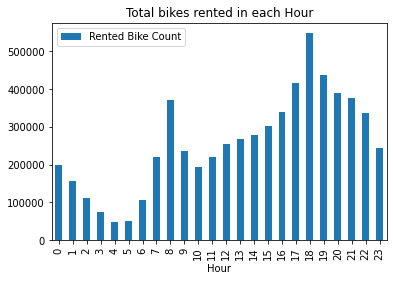

In [14]:
dataset_SeoulBikedata_hour_sum = dataset_SeoulBikedata[['Hour','Rented Bike Count']].groupby('Hour',as_index = False).sum()
dataset_SeoulBikedata_hour_sum.plot.bar(x = 'Hour',y = 'Rented Bike Count', title = 'Total bikes rented in each Hour')


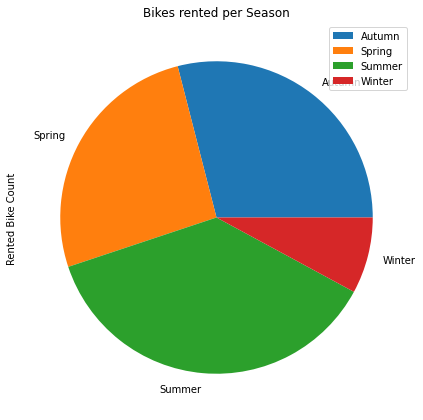

In [15]:
dataset_SeoulBikedata_seasons = dataset_SeoulBikedata[['Seasons','Rented Bike Count']].groupby('Seasons',as_index = True).sum()
dataset_SeoulBikedata_seasons.plot.pie(x = 'Seasons',y = 'Rented Bike Count', title = 'Bikes rented per Season', figsize = (7, 10))

In [16]:
dataset_SeoulBikedata[['Weekday','Rented Bike Count']].groupby('Weekday',as_index = True).sum()

,Rented Bike Count
Weekday,
Friday,950334
Monday,911743
Saturday,885492
Sunday,780194
Thursday,861999
Tuesday,858596
Wednesday,923956


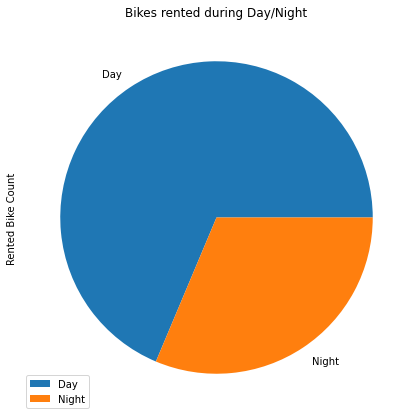

In [17]:
dataset_SeoulBikedata[['Day_or_night','Rented Bike Count']].groupby('Day_or_night',as_index = True).sum().plot.pie(x = 'Day_or_night',y = 'Rented Bike Count', title = 'Bikes rented during Day/Night', figsize = (7, 10))

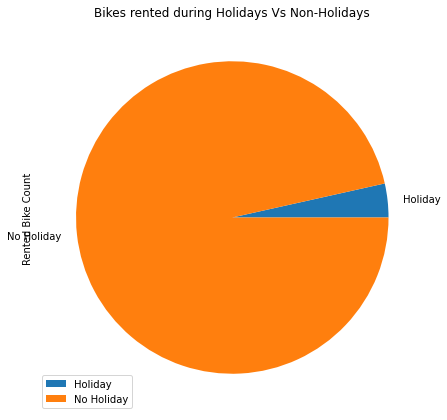

In [18]:
dataset_SeoulBikedata[['Holiday','Rented Bike Count']].groupby('Holiday',as_index = True).sum().plot.pie(x = 'Holiday',y = 'Rented Bike Count', title = 'Bikes rented during Holidays Vs Non-Holidays', figsize = (7, 10))

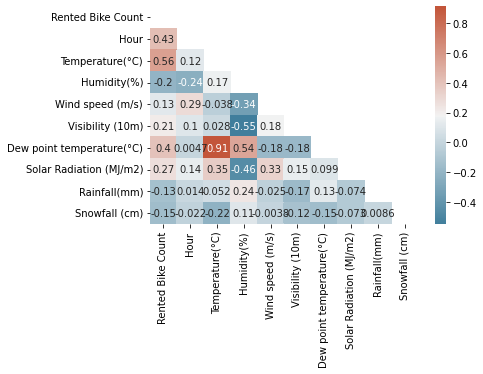

In [19]:
corrMatrix = dataset_SeoulBikedata.corr()
sn.heatmap(corrMatrix, annot=True, cmap = sn.diverging_palette(230, 20, as_cmap=True), mask = np.triu(np.ones_like(corrMatrix)))
sn.set(rc={'figure.figsize':(10,7.5)})

In [20]:
dataset_SeoulBikedata = dataset_SeoulBikedata.drop(columns = ['Dew point temperature(°C)'])

## Encoding Categorical Variables


In [21]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown = "ignore")
df_encoded = pd.DataFrame(one_hot_encoder.fit_transform(dataset_SeoulBikedata[['Seasons','Holiday']]).toarray())
dataset_SeoulBikedata_encoded = dataset_SeoulBikedata.join(df_encoded)

In [22]:
dataset_SeoulBikedata_encoded = dataset_SeoulBikedata_encoded.drop(columns = ['Seasons','Holiday'])

In [23]:
x = dataset_SeoulBikedata_encoded.drop(columns = ['Rented Bike Count', 'Date', 'Weekday', 'Day_or_night'])
y = dataset_SeoulBikedata_encoded['Rented Bike Count']

In [24]:
dataset_SeoulBikedata_encoded.drop(columns = ['Rented Bike Count', 'Date', 'Weekday', 'Day_or_night'])

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),0,1,2,3,4,5
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,19,4.2,34,2.6,1894,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8461,20,3.4,37,2.3,2000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8462,21,2.6,39,0.3,1968,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8463,22,2.1,41,1.0,1859,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Splitting Dataset into Training & Test datasets

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1123401)

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## Cost Function

In [27]:
def cost_function(X,y,w,b):
  z = X.dot(w)+ b
  loss = z-y
  m = len(y)
  cost = np.sum((loss**2)/(2*m))   

  return cost

## Gradient Descent function

In [28]:
def gradient_descent(X,y,w,b,epochs,l_r, stopping_threshold):
  
  m = len(y)
  cost_list = []
  previous_cost = None
  for epoch in range(epochs):
    current_cost = cost_function(X,y,w,b)
    if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
      break
    previous_cost = current_cost
    z = X.dot(w)+b
    loss = z-y

    gradient_weight = X.T.dot(loss)/m
    gradient_bias = np.sum(loss)/m

    w = w - l_r*gradient_weight
    b = b - l_r*gradient_bias
    cost_list.append(current_cost)

  return w,b,cost_list

In [29]:
w = np.random.randn(x_train.shape[1])
b = 0

In [30]:
weight,bias,cost_list = gradient_descent(x_train,y_train,w,b,epochs = 4000, l_r = 0.01, stopping_threshold = 0.001)

In [31]:
weight.round(4)

array([ 202.1249,  318.3968, -166.3862,   17.4748,    1.6138,  -71.6976,
        -72.4991,   10.1982,   74.9647,    9.1879,    3.9452,  -87.8411,
        -13.0839,   13.5354])

Text(0.5, 0, 'Iterations')

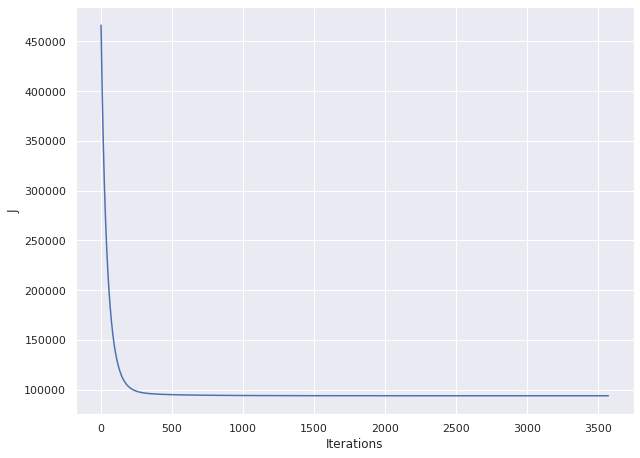

In [32]:
plt.plot(cost_list)
plt.ylabel('J')
plt.xlabel('Iterations')

In [33]:
cost_percent = []
for i in range(len(cost_list)-1):
  cost_percent.append(((cost_list[i]-cost_list[i+1])/cost_list[i+1])*100)
  i += 1
print(cost_percent)

[2.0390746660310914, 2.017727354836358, 1.9965574722545347, 1.9755647950326725, 1.9547489620315814, 1.9341094817647297, 1.9136457399348465, 1.8933570069451635, 1.873242445362956, 1.8533011173138627, 1.8335319917883466, 1.8139339518412214, 1.7945058016674738, 1.7752462735388441, 1.7561540345868154, 1.737227693418493, 1.718465806554472, 1.6998668846771714, 1.6814293986809676, 1.66315178551582, 1.645032453817024, 1.6270697893155335, 1.6092621600240604, 1.5916079211944256, 1.5741054200438829, 1.556753000248218, 1.5395490062001058, 1.5224917870330883, 1.50557970041046, 1.4888111160814916, 1.4721844192059388, 1.4556980134489657, 1.4393503238505432, 1.423139799471646, 1.4070649158220008, 1.3911241770734142, 1.3753161180634625, 1.3596393060950394, 1.3440923425368871, 1.3286738642310305, 1.3133825447131333, 1.2982170952519676, 1.2831762657145591, 1.2682588452630623, 1.2534636628910925, 1.2387895878049517, 1.2242355296578937, 1.209800438643403, 1.1954833054550482, 1.181283161119491, 1.1671990767

Text(0.5, 0, 'Iterations')

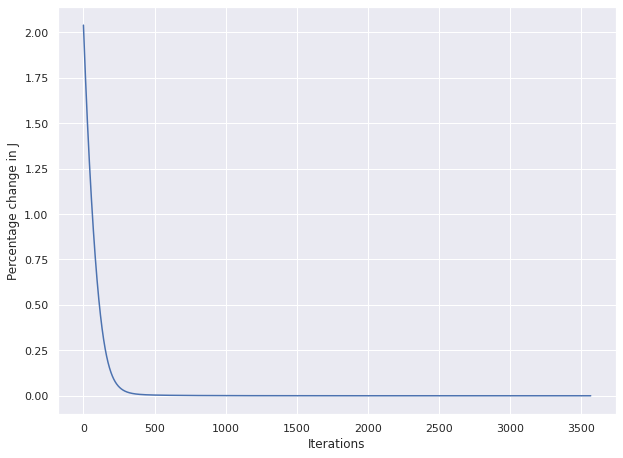

In [34]:
plt.plot(cost_percent)
plt.ylabel('Percentage change in J')
plt.xlabel('Iterations')

## Predict Function

In [35]:
def predict(X,w,b):
  y_pred = X.dot(w)+b
  return y_pred

In [36]:
y_pred_train = predict(x_train,weight,bias)
y_pred_test = predict(x_test,weight,bias)

## R2 squared Metric function

In [37]:
def r2_score(y_pred,y):
  sum_of_residual_errors = np.sum((y_pred - y)**2)
  sum_of_total_errors = np.sum((y - y.mean())**2)
  r2_score = 1 - (sum_of_residual_errors/sum_of_total_errors)
  return r2_score

In [38]:
print('R-squared value for training set is', round(r2_score(y_pred_train, y_train),4))
print('R-squared value for test set is', round(r2_score(y_pred_test,y_test), 4))

R-squared value for training set is 0.5382
R-squared value for test set is 0.5477


In [39]:
def mse(y_pred,y):
  mse = (np.sum((y_pred - y)**2))/(len(y))
  return mse
print('Mean squared error value for training set is', round(mse(y_pred_train, y_train),4))
print('Mean squared error value for test set is', round(mse(y_pred_test,y_test), 4))

Mean squared error value for training set is 187560.4678
Mean squared error value for test set is 193345.6145


In [40]:
def rmse(y_pred,y):
  rmse = ((np.sum((y_pred - y)**2))/(len(y)))**0.5
  return rmse
  
print('Root Mean squared error value for training set is', round(rmse(y_pred_train, y_train),4))
print('Root Mean squared error value for test set is', round(rmse(y_pred_test,y_test), 4))

Root Mean squared error value for training set is 433.0825
Root Mean squared error value for test set is 439.7108


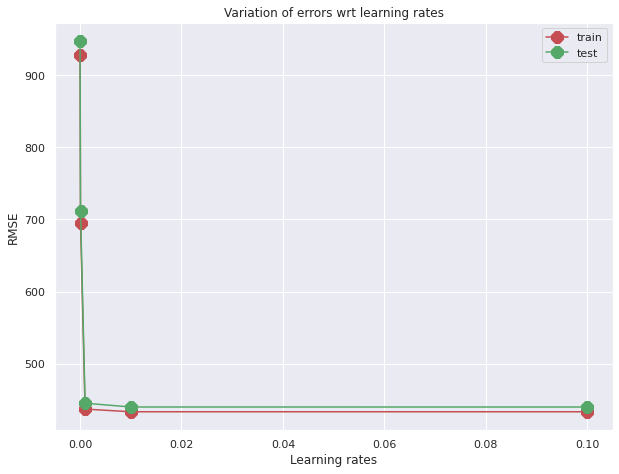

In [41]:
from IPython.core.pylabtools import figsize
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
epochs = 4000
stopping_threshold = 0.001
y_pred_test_list = []
y_pred_train_list = []
for i in range(len(learning_rates)):
    weight,bias,cost_list = gradient_descent(x_train,y_train,w,b,epochs = epochs, l_r = learning_rates[i], stopping_threshold = stopping_threshold)
    y_pred_test_list.append(predict(x_test,weight,bias))
    y_pred_train_list.append(predict(x_train,weight,bias))
    i += 1
train_rmse_list_lr = []
for i in range(len(y_pred_train_list)):
  train_rmse_list_lr.append(rmse(y_pred_train_list[i], y_train))
  i += 1

test_rmse_list_lr = []
for i in range(len(y_pred_test_list)):
  test_rmse_list_lr.append(rmse(y_pred_test_list[i], y_test))
  i += 1
plt.plot(figsize = (10, 10))
plt.plot(learning_rates, train_rmse_list_lr, label = 'train', color = 'r', marker = '8', markersize = 12)
plt.plot(learning_rates, test_rmse_list_lr, label = 'test', color = 'g', marker = '8', markersize = 12)
plt.title('Variation of errors wrt learning rates')
plt.xlabel('Learning rates')
plt.ylabel('RMSE')
plt.legend()
plt.show()

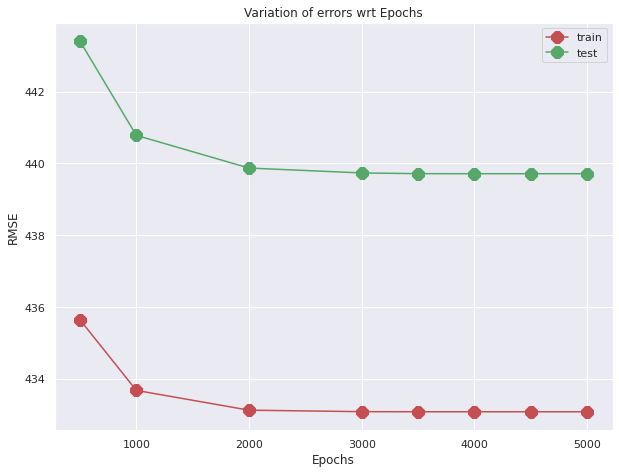

In [42]:
learning_rates = 0.01
epochs = [500, 1000, 2000, 3000, 3500, 4000, 4500, 5000]
stopping_threshold = 0.001
y_pred_test_list = []
y_pred_train_list = []
for i in range(len(epochs)):
    weight,bias,cost_list = gradient_descent(x_train,y_train,w,b,epochs = epochs[i], l_r = learning_rates, stopping_threshold = stopping_threshold)
    y_pred_test_list.append(predict(x_test,weight,bias))
    y_pred_train_list.append(predict(x_train,weight,bias))
    i += 1

train_rmse_list_epoch = []
for i in range(len(y_pred_train_list)):
  train_rmse_list_epoch.append(rmse(y_pred_train_list[i], y_train))
  i += 1

test_rmse_list_epoch = []
for i in range(len(y_pred_test_list)):
  test_rmse_list_epoch.append(rmse(y_pred_test_list[i], y_test))
  i += 1

plt.plot(epochs, train_rmse_list_epoch, label = 'train', color = 'r', marker = '8', markersize = 12)
plt.plot(epochs, test_rmse_list_epoch, label = 'test', color = 'g', marker = '8', markersize = 12)
plt.title('Variation of errors wrt Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

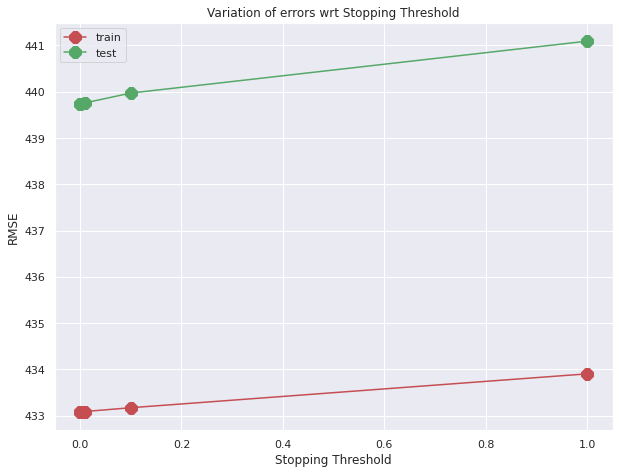

In [43]:
learning_rates = 0.01
epochs = 3000
stopping_threshold = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
y_pred_test_list = []
y_pred_train_list = []
for i in range(len(stopping_threshold)):
    weight,bias,cost_list = gradient_descent(x_train,y_train,w,b,epochs = epochs, l_r = learning_rates, stopping_threshold = stopping_threshold[i])
    y_pred_test_list.append(predict(x_test,weight,bias))
    y_pred_train_list.append(predict(x_train,weight,bias))
    i += 1

train_rmse_list_st = []
for i in range(len(y_pred_train_list)):
  train_rmse_list_st.append(rmse(y_pred_train_list[i], y_train))
  i += 1

test_rmse_list_st = []
for i in range(len(y_pred_test_list)):
  test_rmse_list_st.append(rmse(y_pred_test_list[i], y_test))
  i += 1

plt.plot(stopping_threshold, train_rmse_list_st, label = 'train', color = 'r', marker = '8', markersize = 12)
plt.plot(stopping_threshold, test_rmse_list_st, label = 'test', color = 'g', marker = '8', markersize = 12)
plt.title('Variation of errors wrt Stopping Threshold')
plt.xlabel('Stopping Threshold')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Picking random 8 features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Root Mean squared error value for training set when features are randomly picked is 555.4754
Root Mean squared error value for test set when features are randomly picked is 566.3962


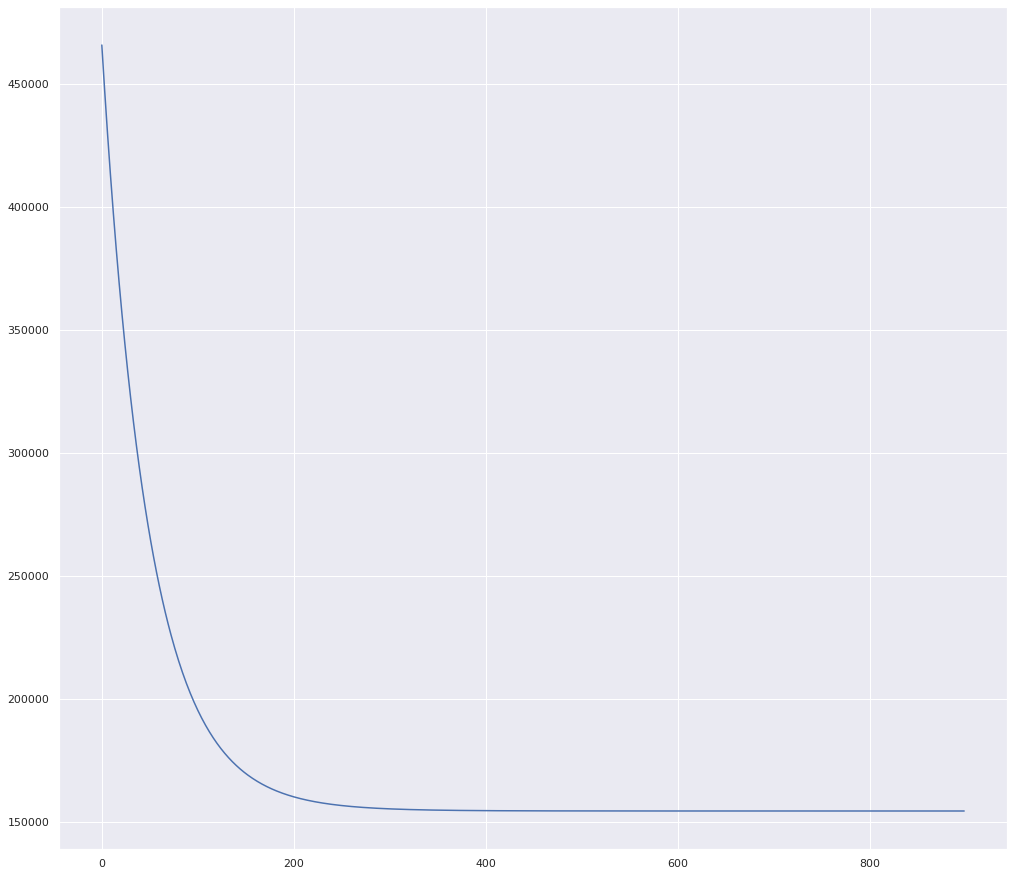

In [58]:
x_random = x.sample(n = 8, axis = 'columns')
y_random = dataset_SeoulBikedata_encoded['Rented Bike Count']

#Splitting Dataset into Training & test set

from sklearn.model_selection import train_test_split
x_train_random, x_test_random, y_train_random, y_test_random = train_test_split(x_random, y_random, test_size = 0.3, random_state = 1123401)

#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_random = sc.fit_transform(x_train_random)
x_test_random = sc.transform(x_test_random)

w_random = np.random.randn(x_train_random.shape[1])
b_random = 0
weight_random,bias_random,cost_list_random = gradient_descent(x_train_random,y_train_random,w_random,b_random,epochs = 4000, l_r = 0.01, stopping_threshold = 0.001)

plt.plot(cost_list_random)

y_pred_train_random = predict(x_train_random,weight_random,bias_random)
y_pred_test_random = predict(x_test_random,weight_random,bias_random)

print('Root Mean squared error value for training set when features are randomly picked is', round(rmse(y_pred_train_random, y_train_random),4))
print('Root Mean squared error value for test set when features are randomly picked is', round(rmse(y_pred_test_random, y_test_random), 4))

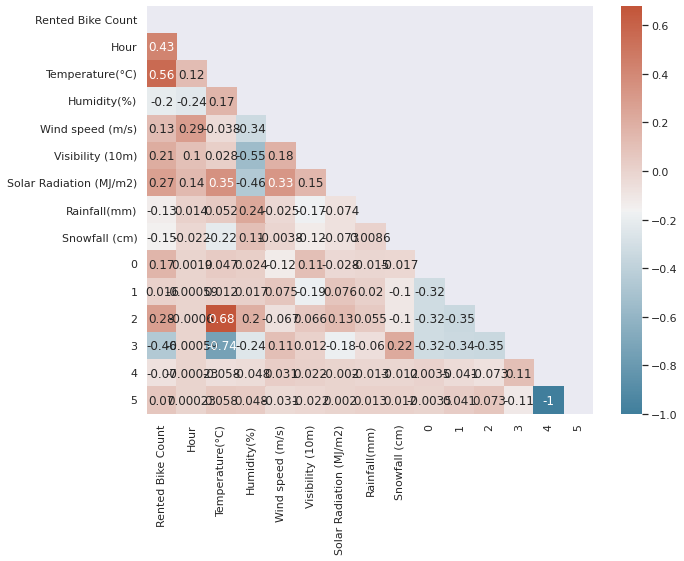

In [45]:
corrMatrix = dataset_SeoulBikedata_encoded.corr()
sn.heatmap(corrMatrix, annot=True, cmap = sn.diverging_palette(230, 20, as_cmap=True), mask = np.triu(np.ones_like(corrMatrix)))
sn.set(rc={'figure.figsize':(17,15.5)})

In [46]:
abs(corrMatrix['Rented Bike Count']).sort_values(ascending = False)

Rented Bike Count          1.000000
Temperature(°C)            0.562740
3                          0.458920
Hour                       0.425256
2                          0.282001
Solar Radiation (MJ/m2)    0.273862
Visibility (10m)           0.212323
Humidity(%)                0.201973
0                          0.165333
Snowfall (cm)              0.151611
Rainfall(mm)               0.128626
Wind speed (m/s)           0.125022
4                          0.070070
5                          0.070070
1                          0.015580
Name: Rented Bike Count, dtype: float64

8 Features selected intuitively

Root Mean squared error value for training set when features are intuitively picked is 453.3875
Root Mean squared error value for test set when features are intuitively picked is 455.5727


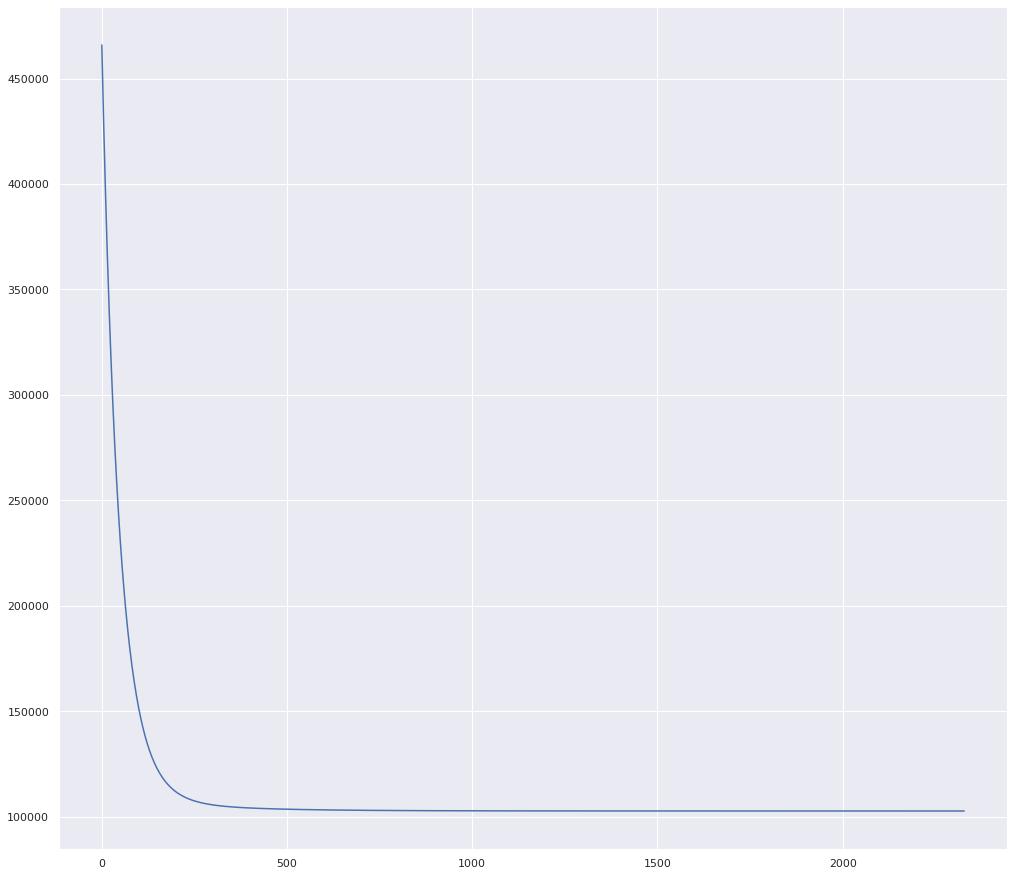

In [47]:
x_intuitively = dataset_SeoulBikedata_encoded[dataset_SeoulBikedata_encoded.columns[dataset_SeoulBikedata_encoded.columns.isin(['Temperature(°C)', '3', 'Hour', '2', 'Solar Radiation (MJ/m2)', 'Visibility (10m)', 'Humidity(%)', '0'])]]
y_intuitively = dataset_SeoulBikedata_encoded['Rented Bike Count']

#Splitting Dataset into Training & test set

from sklearn.model_selection import train_test_split
x_train_intuitively, x_test_intuitively, y_train_intuitively, y_test_intuitively = train_test_split(x_intuitively, y_intuitively, test_size = 0.3, random_state = 1123401)

#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_intuitively = sc.fit_transform(x_train_intuitively)
x_test_intuitively = sc.transform(x_test_intuitively)

w_intuitively = np.random.randn(x_train_intuitively.shape[1])
b_intuitively = 0
weight_intuitively,bias_intuitively,cost_list_intuitively = gradient_descent(x_train_intuitively,y_train_intuitively,w_intuitively,b_intuitively,epochs = 4000, l_r = 0.01, stopping_threshold = 0.001)

plt.plot(cost_list_intuitively)

y_pred_train_intuitively = predict(x_train_intuitively,weight_intuitively,bias_intuitively)
y_pred_test_intuitively = predict(x_test_intuitively,weight_intuitively,bias_intuitively)

print('Root Mean squared error value for training set when features are intuitively picked is', round(rmse(y_pred_train_intuitively, y_train_intuitively),4))
print('Root Mean squared error value for test set when features are intuitively picked is', round(rmse(y_pred_test_intuitively, y_test_intuitively), 4))